In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset:

In [3]:
import kagglehub

In [4]:
path = kagglehub.dataset_download("camnugent/california-housing-prices")
print("Path to dataset files:", path)

Path to dataset files: /Users/zakaria/.cache/kagglehub/datasets/camnugent/california-housing-prices/versions/1


In [5]:
# Load specific files
df = pd.read_csv(f"{path}/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.shape

(20640, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Data preprocessing:

In [11]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [12]:
df['ocean_proximity'] = df['ocean_proximity'].astype('category')

In [13]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_rooms'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [14]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_rooms,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


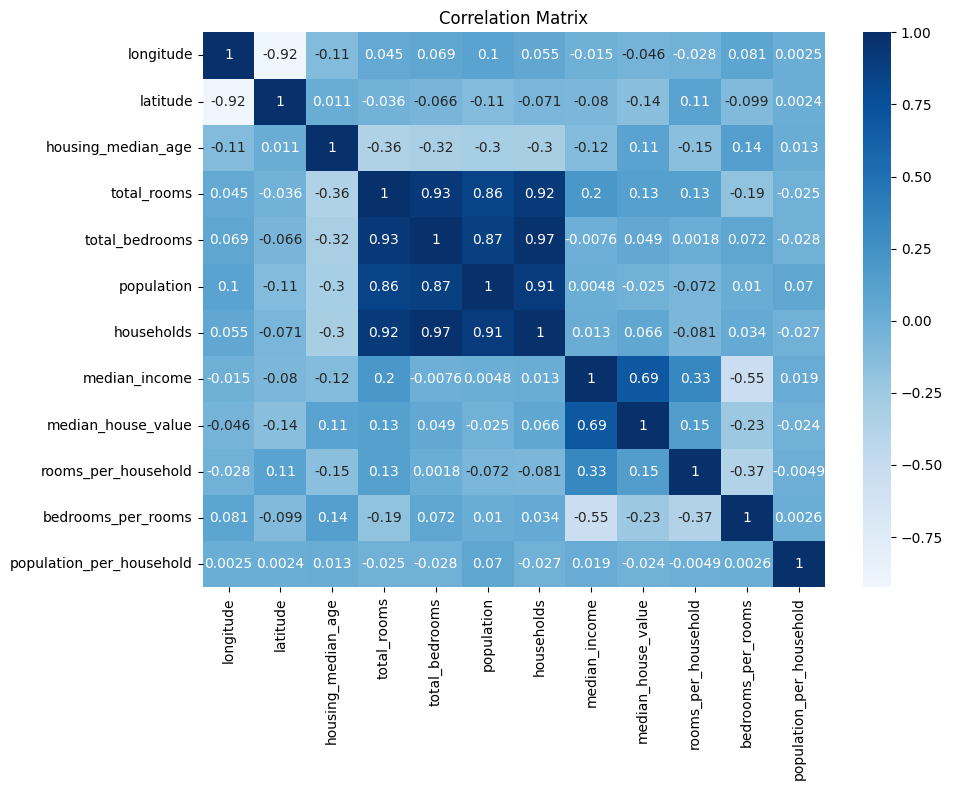

In [15]:
# Check the correlation:
plt.figure(figsize=(10,8))
sns.heatmap((df.drop(['ocean_proximity'], axis=1)).corr(), annot=True, cmap='Blues', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

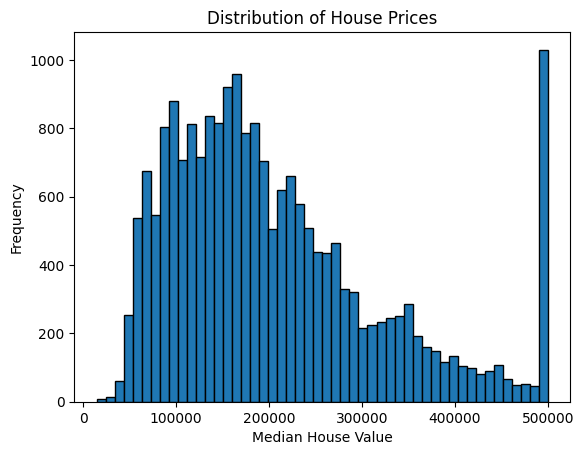

In [16]:
# Visualize the target variable
plt.hist(df['median_house_value'], bins=50, edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

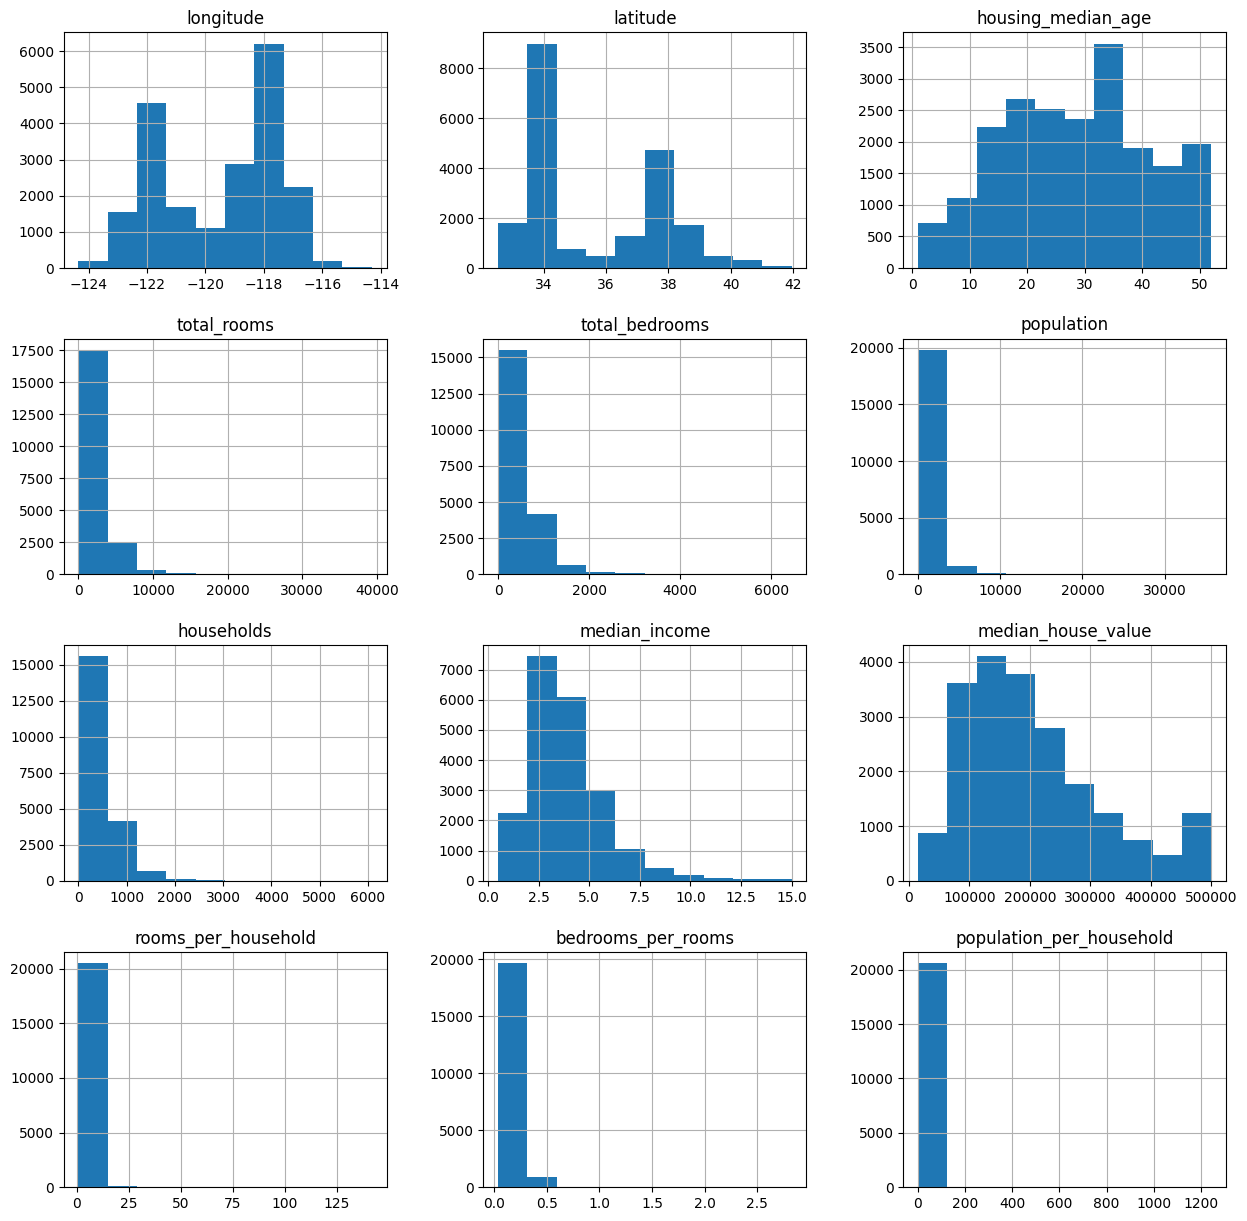

In [17]:
# For all the features:
df.hist(figsize=(15,15));

In [18]:
# Let's make the data more normalized:
df['total_rooms'] = np.log(df['total_rooms'] + 1)
df['total_bedrooms'] = np.log(df['total_bedrooms'] + 1)
df['population'] = np.log(df['population'] + 1)
df['households'] = np.log(df['households'] + 1)
df['rooms_per_household'] = np.log(df['rooms_per_household'] + 1)
df['bedrooms_per_rooms'] = np.log(df['bedrooms_per_rooms'] + 1)
df['population_per_household'] = np.log(df['population_per_household'] + 1)

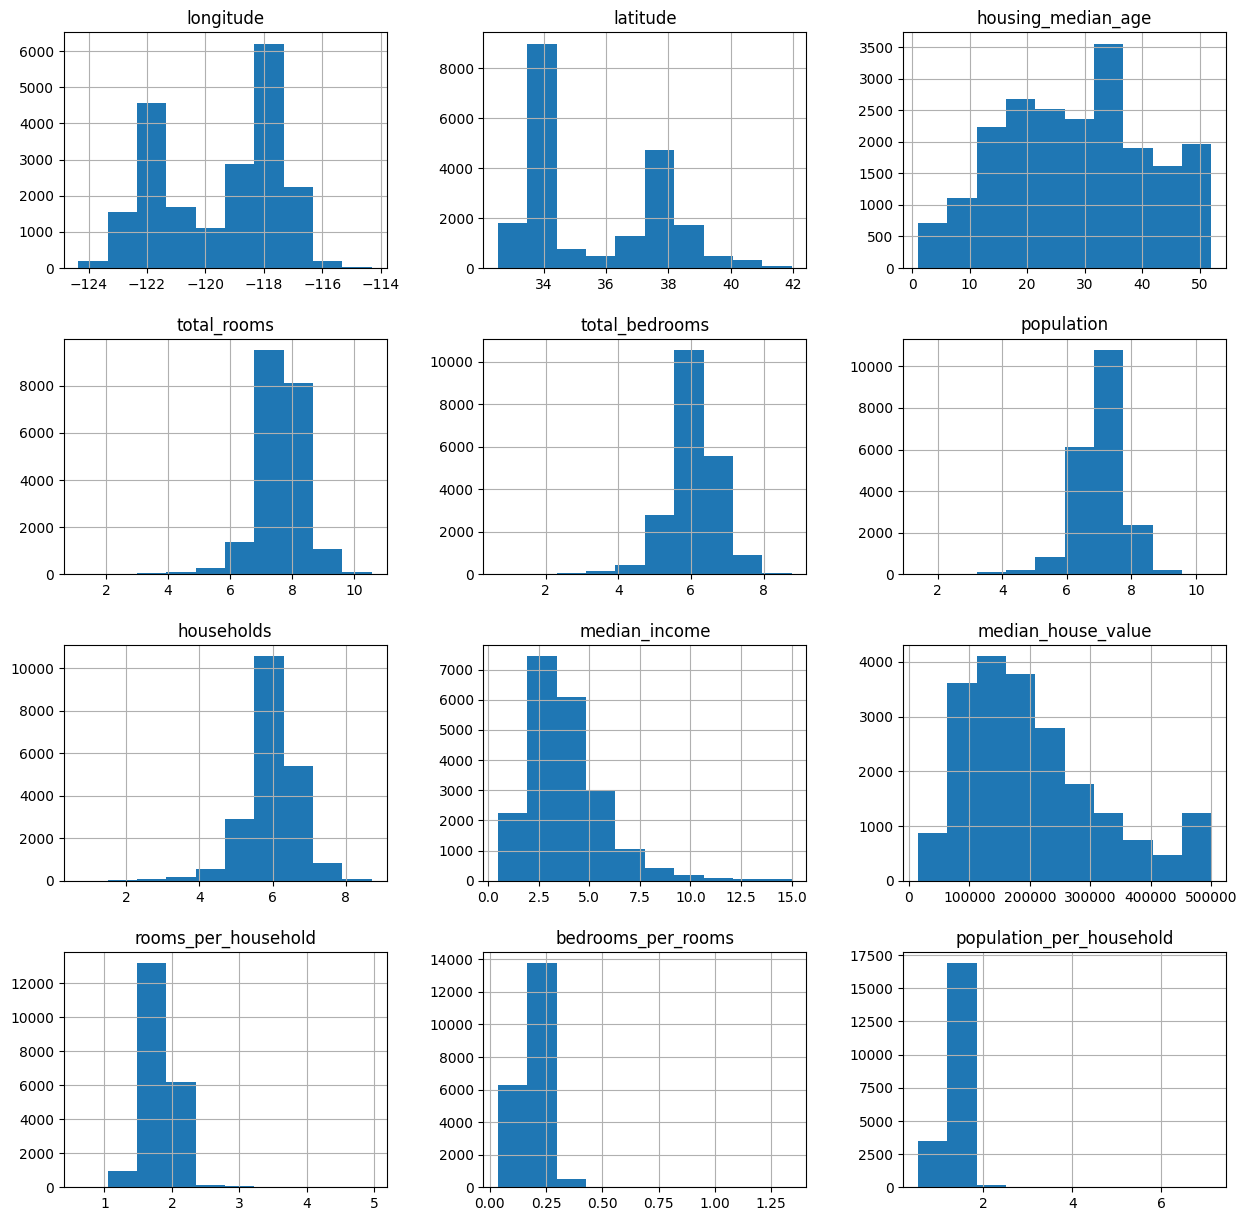

In [19]:
# Check again:
df.hist(figsize=(15,15));

In [20]:
# Handle the categorical data:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [21]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_rooms,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,2.077455,0.136793,1.268511,False,False,True,False
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,1.979364,0.144790,1.134572,False,False,True,False
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,2.228738,0.121789,1.335596,False,False,True,False
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,1.919471,0.169286,1.266369,False,False,True,False
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,1.985385,0.158793,1.157342,False,False,True,False


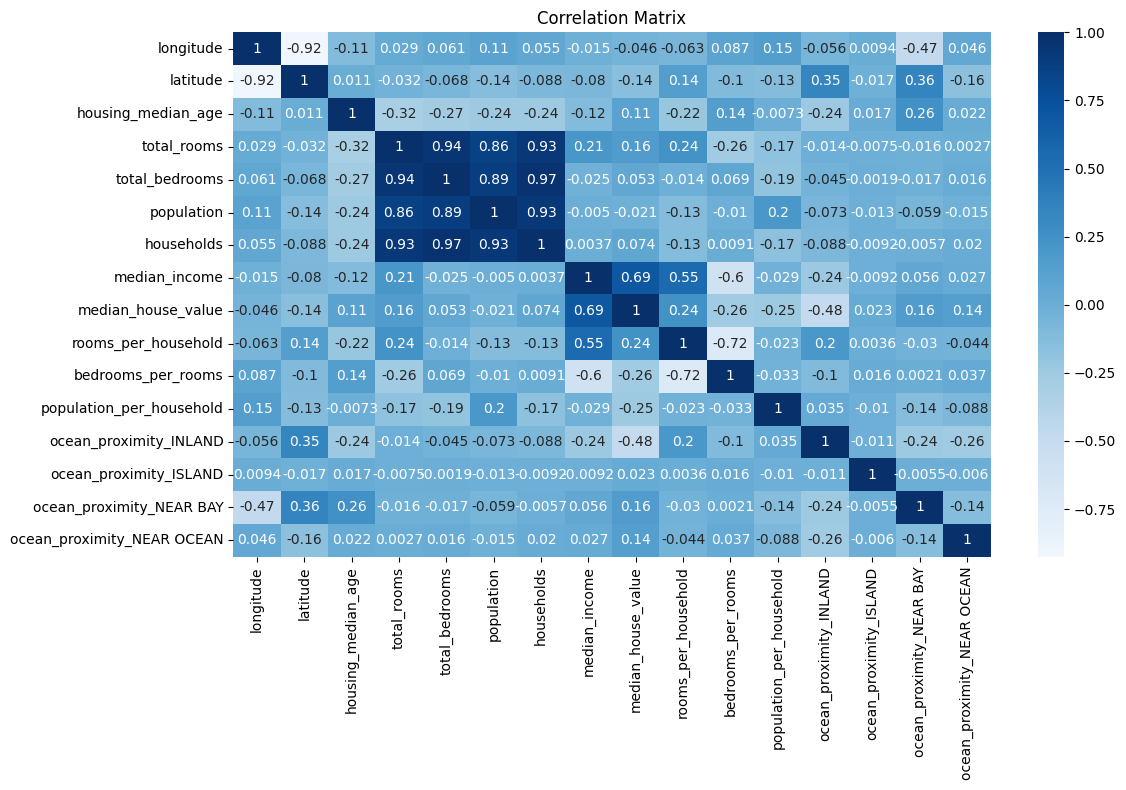

In [22]:
# Check the correlation again with dummy variables:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

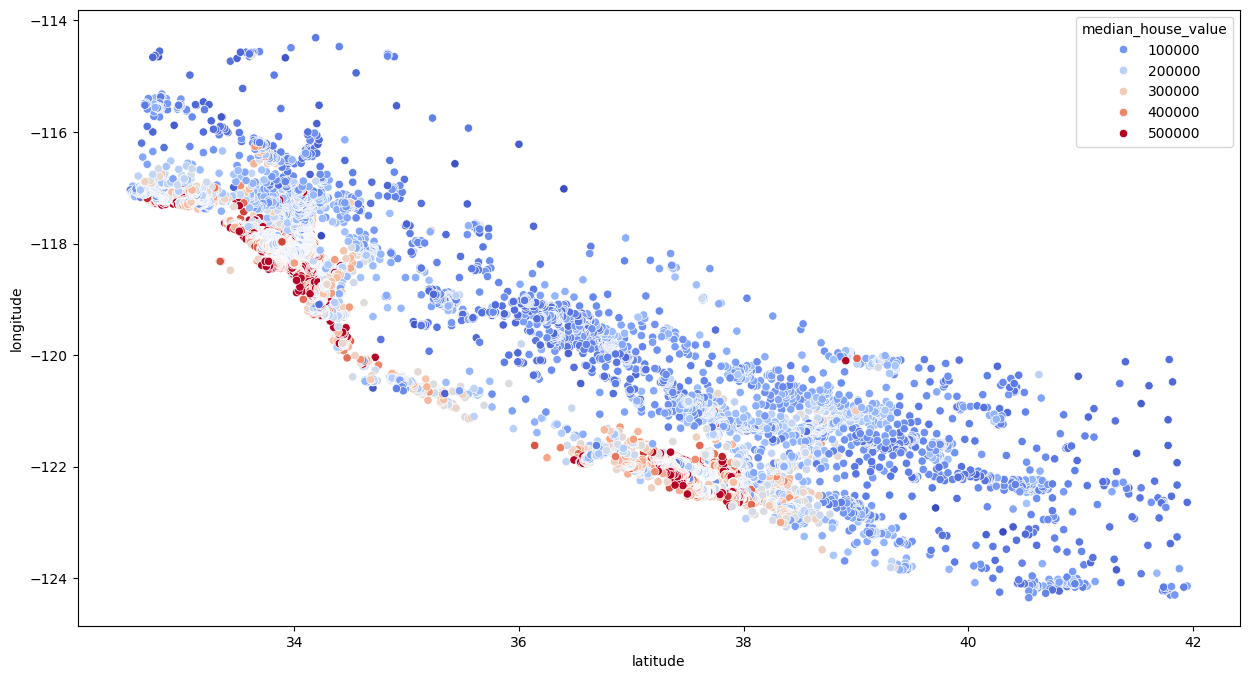

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='median_house_value', palette='coolwarm')

In [24]:
## --> Check the map of California AND you can see that the closest houses to the coast have the highest price.

## Prepare Data for Modeling:

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Build the model:

## Linear Regression:

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [34]:
lin_reg.score(X_test_scaled, y_test)

0.6224977976182993

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [36]:
# Make predictions
y_train_pred = lin_reg.predict(X_train_scaled)
y_test_pred = lin_reg.predict(X_test_scaled)

In [37]:
# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nLinear Regression Performance:")
print(f"Train RMSE: ${train_rmse:,.2f}")
print(f"Test RMSE: ${test_rmse:,.2f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


Linear Regression Performance:
Train RMSE: $64,941.08
Test RMSE: $70,333.65
Train R²: 0.6845
Test R²: 0.6225


## Random Forest:

In [167]:
from sklearn.ensemble import RandomForestRegressor

In [169]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [171]:
rf_model.score(X_test_scaled, y_test)

0.8085980164433073

In [42]:
# Make predictions
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

In [43]:
# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nLinear Regression Performance:")
print(f"Train RMSE: ${train_rmse:,.2f}")
print(f"Test RMSE: ${test_rmse:,.2f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


Linear Regression Performance:
Train RMSE: $18,547.63
Test RMSE: $50,124.43
Train R²: 0.9743
Test R²: 0.8083


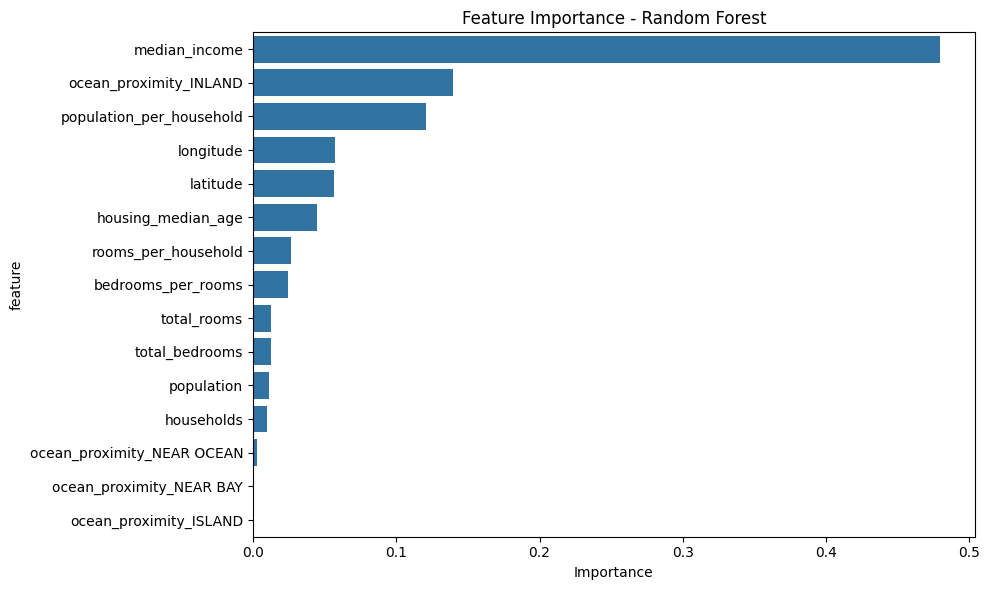

In [44]:
# >> Get features importance

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [46]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Grid search
rf_model = RandomForestRegressor()
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [93]:
best_rf = grid_search.best_estimator_
best_estimator.score(X_test_scaled, y_test)

0.8107162678005319

## XGBoost:

In [106]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [140]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [142]:
xgb_model.score(X_test_scaled, y_test)

0.830451805666127

## Test for a sample:

In [210]:
sample_house_1 = {
    'longitude': -122.23,
    'latitude': 37.88,
    'housing_median_age': 41,
    'total_rooms': 880,
    'total_bedrooms': 129,
    'population': 322,
    'households': 126,
    'median_income': 8.3252,
    # Ocean proximity (one-hot encoded)
    'ocean_proximity_INLAND': 0,
    'ocean_proximity_ISLAND': 0,
    'ocean_proximity_NEAR BAY': 1,
    'ocean_proximity_NEAR OCEAN': 0,
    # Derived features
    'rooms_per_household': 880/126,
    'bedrooms_per_room': 129/880,
    'population_per_household': 322/126,
    'bedrooms_per_rooms': 129/880  # Same as bedrooms_per_room
}

In [225]:
sample_df = pd.DataFrame([sample_house_1])
sample_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household,bedrooms_per_rooms
0,-122.23,37.88,41,880,129,322,126,8.3252,0,0,1,0,6.984127,0.146591,2.555556,0.146591


In [227]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_rooms,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,2.077455,0.136793,1.268511,False,False,True,False
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,1.979364,0.144790,1.134572,False,False,True,False
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,2.228738,0.121789,1.335596,False,False,True,False
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,1.919471,0.169286,1.266369,False,False,True,False
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,1.985385,0.158793,1.157342,False,False,True,False


In [229]:
# Reorder columns to match training data exactly
sample_df = sample_df[X.columns]

In [231]:
# check it:
sample_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_rooms,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129,322,126,8.3252,6.984127,0.146591,2.555556,0,0,1,0


In [235]:
sample_scaled = scaler.transform(sample_df)
sample_scaled

array([[-1.32016306e+00,  1.04692041e+00,  9.83304186e-01,
         1.16498780e+03,  1.69509720e+02,  4.28676713e+02,
         1.65360608e+02,  2.33397811e+00,  2.22540158e+01,
        -9.88707572e-01,  5.73533684e+00, -6.80574180e-01,
        -1.55662057e-02,  2.81178749e+00, -3.80263103e-01]])

In [239]:
# Make prediction
prediction = rf_model.predict(sample_scaled)[0]

In [241]:
prediction

427700.14